In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [76]:
# Read the data
btcusdt_df = pd.read_csv('data/BTCUSDT.csv')

In [77]:
btcusdt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049843 entries, 0 to 1049842
Data columns (total 12 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   open_time                     1049843 non-null  object 
 1   open                          1049843 non-null  float64
 2   high                          1049843 non-null  float64
 3   low                           1049843 non-null  float64
 4   close                         1049843 non-null  float64
 5   volume                        1049843 non-null  float64
 6   close_time                    1049843 non-null  object 
 7   quote_asset_volume            1049843 non-null  float64
 8   number_of_trades              1049843 non-null  float64
 9   taker_buy_base_asset_volume   1049843 non-null  float64
 10  taker_buy_quote_asset_volume  1049843 non-null  float64
 11  ignore                        1049843 non-null  int64  
dtypes: float64(9), int64(1), obj

In [78]:
btcusdt_df

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2020-11-11 19:09:00,15863.79,15863.79,15844.34,15846.36,45.504945,2020-11-11 19:09:59.999000064,7.214486e+05,733.0,20.034791,3.176344e+05,0
1,2020-11-11 19:10:00,15846.35,15848.35,15835.36,15839.97,43.238682,2020-11-11 19:10:59.999000064,6.848593e+05,718.0,18.795452,2.976885e+05,0
2,2020-11-11 19:11:00,15839.97,15839.98,15808.87,15816.68,56.367325,2020-11-11 19:11:59.999000064,8.919803e+05,938.0,17.360259,2.746762e+05,0
3,2020-11-11 19:12:00,15816.68,15845.46,15810.52,15828.86,46.799855,2020-11-11 19:12:59.999000064,7.408392e+05,849.0,22.715319,3.596299e+05,0
4,2020-11-11 19:13:00,15828.86,15845.63,15828.85,15841.83,38.239808,2020-11-11 19:13:59.999000064,6.057827e+05,550.0,8.964647,1.419979e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1049838,2022-11-11 19:12:00,16844.14,16847.51,16793.00,16803.38,247.516120,2022-11-11 19:12:59.999000064,4.162588e+06,6576.0,117.574960,1.977671e+06,0
1049839,2022-11-11 19:13:00,16801.58,16804.26,16771.27,16784.64,180.511560,2022-11-11 19:13:59.999000064,3.030156e+06,5502.0,85.876850,1.441585e+06,0
1049840,2022-11-11 19:14:00,16784.64,16815.59,16770.22,16788.85,177.237160,2022-11-11 19:14:59.999000064,2.975684e+06,6502.0,83.343530,1.399269e+06,0
1049841,2022-11-11 19:15:00,16788.85,16837.48,16788.05,16812.36,201.419320,2022-11-11 19:15:59.999000064,3.386130e+06,6771.0,94.994690,1.596958e+06,0


In [79]:
btcusdt_df['open_time'] = pd.to_datetime(btcusdt_df['open_time'], format='%Y-%m-%d %H:%M:%S')
btcusdt_df

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2020-11-11 19:09:00,15863.79,15863.79,15844.34,15846.36,45.504945,2020-11-11 19:09:59.999000064,7.214486e+05,733.0,20.034791,3.176344e+05,0
1,2020-11-11 19:10:00,15846.35,15848.35,15835.36,15839.97,43.238682,2020-11-11 19:10:59.999000064,6.848593e+05,718.0,18.795452,2.976885e+05,0
2,2020-11-11 19:11:00,15839.97,15839.98,15808.87,15816.68,56.367325,2020-11-11 19:11:59.999000064,8.919803e+05,938.0,17.360259,2.746762e+05,0
3,2020-11-11 19:12:00,15816.68,15845.46,15810.52,15828.86,46.799855,2020-11-11 19:12:59.999000064,7.408392e+05,849.0,22.715319,3.596299e+05,0
4,2020-11-11 19:13:00,15828.86,15845.63,15828.85,15841.83,38.239808,2020-11-11 19:13:59.999000064,6.057827e+05,550.0,8.964647,1.419979e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1049838,2022-11-11 19:12:00,16844.14,16847.51,16793.00,16803.38,247.516120,2022-11-11 19:12:59.999000064,4.162588e+06,6576.0,117.574960,1.977671e+06,0
1049839,2022-11-11 19:13:00,16801.58,16804.26,16771.27,16784.64,180.511560,2022-11-11 19:13:59.999000064,3.030156e+06,5502.0,85.876850,1.441585e+06,0
1049840,2022-11-11 19:14:00,16784.64,16815.59,16770.22,16788.85,177.237160,2022-11-11 19:14:59.999000064,2.975684e+06,6502.0,83.343530,1.399269e+06,0
1049841,2022-11-11 19:15:00,16788.85,16837.48,16788.05,16812.36,201.419320,2022-11-11 19:15:59.999000064,3.386130e+06,6771.0,94.994690,1.596958e+06,0


In [80]:
btcusdt_df['close_time'] = pd.to_datetime(btcusdt_df['close_time'], format='%Y-%m-%d %H:%M:%S')
btcusdt_df

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2020-11-11 19:09:00,15863.79,15863.79,15844.34,15846.36,45.504945,2020-11-11 19:09:59.999000064,7.214486e+05,733.0,20.034791,3.176344e+05,0
1,2020-11-11 19:10:00,15846.35,15848.35,15835.36,15839.97,43.238682,2020-11-11 19:10:59.999000064,6.848593e+05,718.0,18.795452,2.976885e+05,0
2,2020-11-11 19:11:00,15839.97,15839.98,15808.87,15816.68,56.367325,2020-11-11 19:11:59.999000064,8.919803e+05,938.0,17.360259,2.746762e+05,0
3,2020-11-11 19:12:00,15816.68,15845.46,15810.52,15828.86,46.799855,2020-11-11 19:12:59.999000064,7.408392e+05,849.0,22.715319,3.596299e+05,0
4,2020-11-11 19:13:00,15828.86,15845.63,15828.85,15841.83,38.239808,2020-11-11 19:13:59.999000064,6.057827e+05,550.0,8.964647,1.419979e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1049838,2022-11-11 19:12:00,16844.14,16847.51,16793.00,16803.38,247.516120,2022-11-11 19:12:59.999000064,4.162588e+06,6576.0,117.574960,1.977671e+06,0
1049839,2022-11-11 19:13:00,16801.58,16804.26,16771.27,16784.64,180.511560,2022-11-11 19:13:59.999000064,3.030156e+06,5502.0,85.876850,1.441585e+06,0
1049840,2022-11-11 19:14:00,16784.64,16815.59,16770.22,16788.85,177.237160,2022-11-11 19:14:59.999000064,2.975684e+06,6502.0,83.343530,1.399269e+06,0
1049841,2022-11-11 19:15:00,16788.85,16837.48,16788.05,16812.36,201.419320,2022-11-11 19:15:59.999000064,3.386130e+06,6771.0,94.994690,1.596958e+06,0


In [81]:
btcusdt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049843 entries, 0 to 1049842
Data columns (total 12 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   open_time                     1049843 non-null  datetime64[ns]
 1   open                          1049843 non-null  float64       
 2   high                          1049843 non-null  float64       
 3   low                           1049843 non-null  float64       
 4   close                         1049843 non-null  float64       
 5   volume                        1049843 non-null  float64       
 6   close_time                    1049843 non-null  datetime64[ns]
 7   quote_asset_volume            1049843 non-null  float64       
 8   number_of_trades              1049843 non-null  float64       
 9   taker_buy_base_asset_volume   1049843 non-null  float64       
 10  taker_buy_quote_asset_volume  1049843 non-null  float64       
 11

In [82]:
btcusdt_df['open_time'] = btcusdt_df['open_time'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
btcusdt_df

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2020-11-11 14:09:00-05:00,15863.79,15863.79,15844.34,15846.36,45.504945,2020-11-11 19:09:59.999000064,7.214486e+05,733.0,20.034791,3.176344e+05,0
1,2020-11-11 14:10:00-05:00,15846.35,15848.35,15835.36,15839.97,43.238682,2020-11-11 19:10:59.999000064,6.848593e+05,718.0,18.795452,2.976885e+05,0
2,2020-11-11 14:11:00-05:00,15839.97,15839.98,15808.87,15816.68,56.367325,2020-11-11 19:11:59.999000064,8.919803e+05,938.0,17.360259,2.746762e+05,0
3,2020-11-11 14:12:00-05:00,15816.68,15845.46,15810.52,15828.86,46.799855,2020-11-11 19:12:59.999000064,7.408392e+05,849.0,22.715319,3.596299e+05,0
4,2020-11-11 14:13:00-05:00,15828.86,15845.63,15828.85,15841.83,38.239808,2020-11-11 19:13:59.999000064,6.057827e+05,550.0,8.964647,1.419979e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1049838,2022-11-11 14:12:00-05:00,16844.14,16847.51,16793.00,16803.38,247.516120,2022-11-11 19:12:59.999000064,4.162588e+06,6576.0,117.574960,1.977671e+06,0
1049839,2022-11-11 14:13:00-05:00,16801.58,16804.26,16771.27,16784.64,180.511560,2022-11-11 19:13:59.999000064,3.030156e+06,5502.0,85.876850,1.441585e+06,0
1049840,2022-11-11 14:14:00-05:00,16784.64,16815.59,16770.22,16788.85,177.237160,2022-11-11 19:14:59.999000064,2.975684e+06,6502.0,83.343530,1.399269e+06,0
1049841,2022-11-11 14:15:00-05:00,16788.85,16837.48,16788.05,16812.36,201.419320,2022-11-11 19:15:59.999000064,3.386130e+06,6771.0,94.994690,1.596958e+06,0


In [83]:
btcusdt_df['close_time'] = btcusdt_df['close_time'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
btcusdt_df

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2020-11-11 14:09:00-05:00,15863.79,15863.79,15844.34,15846.36,45.504945,2020-11-11 14:09:59.999000064-05:00,7.214486e+05,733.0,20.034791,3.176344e+05,0
1,2020-11-11 14:10:00-05:00,15846.35,15848.35,15835.36,15839.97,43.238682,2020-11-11 14:10:59.999000064-05:00,6.848593e+05,718.0,18.795452,2.976885e+05,0
2,2020-11-11 14:11:00-05:00,15839.97,15839.98,15808.87,15816.68,56.367325,2020-11-11 14:11:59.999000064-05:00,8.919803e+05,938.0,17.360259,2.746762e+05,0
3,2020-11-11 14:12:00-05:00,15816.68,15845.46,15810.52,15828.86,46.799855,2020-11-11 14:12:59.999000064-05:00,7.408392e+05,849.0,22.715319,3.596299e+05,0
4,2020-11-11 14:13:00-05:00,15828.86,15845.63,15828.85,15841.83,38.239808,2020-11-11 14:13:59.999000064-05:00,6.057827e+05,550.0,8.964647,1.419979e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1049838,2022-11-11 14:12:00-05:00,16844.14,16847.51,16793.00,16803.38,247.516120,2022-11-11 14:12:59.999000064-05:00,4.162588e+06,6576.0,117.574960,1.977671e+06,0
1049839,2022-11-11 14:13:00-05:00,16801.58,16804.26,16771.27,16784.64,180.511560,2022-11-11 14:13:59.999000064-05:00,3.030156e+06,5502.0,85.876850,1.441585e+06,0
1049840,2022-11-11 14:14:00-05:00,16784.64,16815.59,16770.22,16788.85,177.237160,2022-11-11 14:14:59.999000064-05:00,2.975684e+06,6502.0,83.343530,1.399269e+06,0
1049841,2022-11-11 14:15:00-05:00,16788.85,16837.48,16788.05,16812.36,201.419320,2022-11-11 14:15:59.999000064-05:00,3.386130e+06,6771.0,94.994690,1.596958e+06,0


In [84]:
btcusdt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049843 entries, 0 to 1049842
Data columns (total 12 columns):
 #   Column                        Non-Null Count    Dtype                     
---  ------                        --------------    -----                     
 0   open_time                     1049843 non-null  datetime64[ns, US/Eastern]
 1   open                          1049843 non-null  float64                   
 2   high                          1049843 non-null  float64                   
 3   low                           1049843 non-null  float64                   
 4   close                         1049843 non-null  float64                   
 5   volume                        1049843 non-null  float64                   
 6   close_time                    1049843 non-null  datetime64[ns, US/Eastern]
 7   quote_asset_volume            1049843 non-null  float64                   
 8   number_of_trades              1049843 non-null  float64                   
 9   ta

In [85]:
btcusdt_df.reset_index(drop=True,inplace=True)
btcusdt_df

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2020-11-11 14:09:00-05:00,15863.79,15863.79,15844.34,15846.36,45.504945,2020-11-11 14:09:59.999000064-05:00,7.214486e+05,733.0,20.034791,3.176344e+05,0
1,2020-11-11 14:10:00-05:00,15846.35,15848.35,15835.36,15839.97,43.238682,2020-11-11 14:10:59.999000064-05:00,6.848593e+05,718.0,18.795452,2.976885e+05,0
2,2020-11-11 14:11:00-05:00,15839.97,15839.98,15808.87,15816.68,56.367325,2020-11-11 14:11:59.999000064-05:00,8.919803e+05,938.0,17.360259,2.746762e+05,0
3,2020-11-11 14:12:00-05:00,15816.68,15845.46,15810.52,15828.86,46.799855,2020-11-11 14:12:59.999000064-05:00,7.408392e+05,849.0,22.715319,3.596299e+05,0
4,2020-11-11 14:13:00-05:00,15828.86,15845.63,15828.85,15841.83,38.239808,2020-11-11 14:13:59.999000064-05:00,6.057827e+05,550.0,8.964647,1.419979e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1049838,2022-11-11 14:12:00-05:00,16844.14,16847.51,16793.00,16803.38,247.516120,2022-11-11 14:12:59.999000064-05:00,4.162588e+06,6576.0,117.574960,1.977671e+06,0
1049839,2022-11-11 14:13:00-05:00,16801.58,16804.26,16771.27,16784.64,180.511560,2022-11-11 14:13:59.999000064-05:00,3.030156e+06,5502.0,85.876850,1.441585e+06,0
1049840,2022-11-11 14:14:00-05:00,16784.64,16815.59,16770.22,16788.85,177.237160,2022-11-11 14:14:59.999000064-05:00,2.975684e+06,6502.0,83.343530,1.399269e+06,0
1049841,2022-11-11 14:15:00-05:00,16788.85,16837.48,16788.05,16812.36,201.419320,2022-11-11 14:15:59.999000064-05:00,3.386130e+06,6771.0,94.994690,1.596958e+06,0


In [86]:
btcusdt_df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2020-11-11 14:09:00-05:00,15863.79,15863.79,15844.34,15846.36,45.504945,2020-11-11 14:09:59.999000064-05:00,721448.646407,733.0,20.034791,317634.449780,0
1,2020-11-11 14:10:00-05:00,15846.35,15848.35,15835.36,15839.97,43.238682,2020-11-11 14:10:59.999000064-05:00,684859.284441,718.0,18.795452,297688.465738,0
2,2020-11-11 14:11:00-05:00,15839.97,15839.98,15808.87,15816.68,56.367325,2020-11-11 14:11:59.999000064-05:00,891980.315430,938.0,17.360259,274676.225348,0
3,2020-11-11 14:12:00-05:00,15816.68,15845.46,15810.52,15828.86,46.799855,2020-11-11 14:12:59.999000064-05:00,740839.187743,849.0,22.715319,359629.946412,0
4,2020-11-11 14:13:00-05:00,15828.86,15845.63,15828.85,15841.83,38.239808,2020-11-11 14:13:59.999000064-05:00,605782.657620,550.0,8.964647,141997.855299,0


In [87]:
btcusdt_df.tail()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
1049838,2022-11-11 14:12:00-05:00,16844.14,16847.51,16793.00,16803.38,247.51612,2022-11-11 14:12:59.999000064-05:00,4.162588e+06,6576.0,117.57496,1.977671e+06,0
1049839,2022-11-11 14:13:00-05:00,16801.58,16804.26,16771.27,16784.64,180.51156,2022-11-11 14:13:59.999000064-05:00,3.030156e+06,5502.0,85.87685,1.441585e+06,0
1049840,2022-11-11 14:14:00-05:00,16784.64,16815.59,16770.22,16788.85,177.23716,2022-11-11 14:14:59.999000064-05:00,2.975684e+06,6502.0,83.34353,1.399269e+06,0
1049841,2022-11-11 14:15:00-05:00,16788.85,16837.48,16788.05,16812.36,201.41932,2022-11-11 14:15:59.999000064-05:00,3.386130e+06,6771.0,94.99469,1.596958e+06,0
1049842,2022-11-11 14:16:00-05:00,16812.36,16833.01,16801.55,16821.05,135.94830,2022-11-11 14:16:59.999000064-05:00,2.286594e+06,4485.0,72.93785,1.226802e+06,0


In [88]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

missing_values_table(btcusdt_df)

Your selected dataframe has 12 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [89]:
btcusdt_df.describe()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
count,1.049843e+06,1.049843e+06,1.049843e+06,1.049843e+06,1.049843e+06,1.049843e+06,1.049843e+06,1.049843e+06,1.049843e+06,1049843.0
mean,3.802118e+04,3.804709e+04,3.799535e+04,3.802117e+04,6.957451e+01,2.161824e+06,1.621655e+03,3.443591e+01,1.068289e+06,0.0
std,1.354249e+04,1.355065e+04,1.353413e+04,1.354249e+04,1.070130e+02,2.817388e+06,1.871513e+03,5.439073e+01,1.457348e+06,0.0
min,1.549878e+04,1.552482e+04,1.544064e+04,1.549877e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,2.370907e+04,2.372617e+04,2.369029e+04,2.370903e+04,1.854695e+01,7.246683e+05,6.120000e+02,8.553720e+00,3.345975e+05,0.0
50%,3.871594e+04,3.874502e+04,3.869000e+04,3.871598e+04,3.585108e+01,1.353189e+06,1.001000e+03,1.724898e+01,6.523616e+05,0.0
75%,4.789907e+04,4.792999e+04,4.786802e+04,4.789910e+04,7.670436e+01,2.544289e+06,1.886500e+03,3.795998e+01,1.258474e+06,0.0
max,6.900000e+04,6.900000e+04,6.878670e+04,6.900000e+04,4.448796e+03,1.155494e+08,6.258400e+04,2.851740e+03,8.947551e+07,0.0


In [90]:
btcusdt_df['open_time'].describe()

count                       1049843
unique                      1049843
top       2020-11-11 14:09:00-05:00
freq                              1
first     2020-11-11 14:09:00-05:00
last      2022-11-11 14:16:00-05:00
Name: open_time, dtype: object

In [91]:
btcusdt_df['close_time'].describe()

count                                 1049843
unique                                1049843
top       2020-11-11 14:09:59.999000064-05:00
freq                                        1
first     2020-11-11 14:09:59.999000064-05:00
last      2022-11-11 14:16:59.999000064-05:00
Name: close_time, dtype: object

In [92]:
btcusdt_df.describe(include='all')

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
count,1049843,1.049843e+06,1.049843e+06,1.049843e+06,1.049843e+06,1.049843e+06,1049843,1.049843e+06,1.049843e+06,1.049843e+06,1.049843e+06,1049843.0
unique,1049843,NaN,NaN,NaN,NaN,NaN,1049843,NaN,NaN,NaN,NaN,NaN
top,2020-11-11 14:09:00-05:00,NaN,NaN,NaN,NaN,NaN,2020-11-11 14:09:59.999000064-05:00,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
first,2020-11-11 14:09:00-05:00,NaN,NaN,NaN,NaN,NaN,2020-11-11 14:09:59.999000064-05:00,NaN,NaN,NaN,NaN,NaN
last,2022-11-11 14:16:00-05:00,NaN,NaN,NaN,NaN,NaN,2022-11-11 14:16:59.999000064-05:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.802118e+04,3.804709e+04,3.799535e+04,3.802117e+04,6.957451e+01,NaN,2.161824e+06,1.621655e+03,3.443591e+01,1.068289e+06,0.0
std,NaN,1.354249e+04,1.355065e+04,1.353413e+04,1.354249e+04,1.070130e+02,NaN,2.817388e+06,1.871513e+03,5.439073e+01,1.457348e+06,0.0
min,NaN,1.549878e+04,1.552482e+04,1.544064e+04,1.549877e+04,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,NaN,2.370907e+04,2.372617e+04,2.369029e+04,2.370903e+04,1.854695e+01,NaN,7.246683e+05,6.120000e+02,8.553720e+00,3.345975e+05,0.0


<center><h1>Dependency impact analysis</h1></center>

In [93]:
btcusdt_df[['open_time', 'high']].groupby(['open_time'], as_index=False).mean().sort_values(by='high', ascending=False)

,open_time,high
522503,2021-11-10 09:17:00-05:00,69000.00
522502,2021-11-10 09:16:00-05:00,69000.00
522504,2021-11-10 09:18:00-05:00,68950.00
522501,2021-11-10 09:15:00-05:00,68800.00
522673,2021-11-10 12:07:00-05:00,68775.51
...,...,...
309,2020-11-11 19:18:00-05:00,15553.03
307,2020-11-11 19:16:00-05:00,15550.00
306,2020-11-11 19:15:00-05:00,15531.37
305,2020-11-11 19:14:00-05:00,15529.06


<AxesSubplot:xlabel='high', ylabel='Density'>

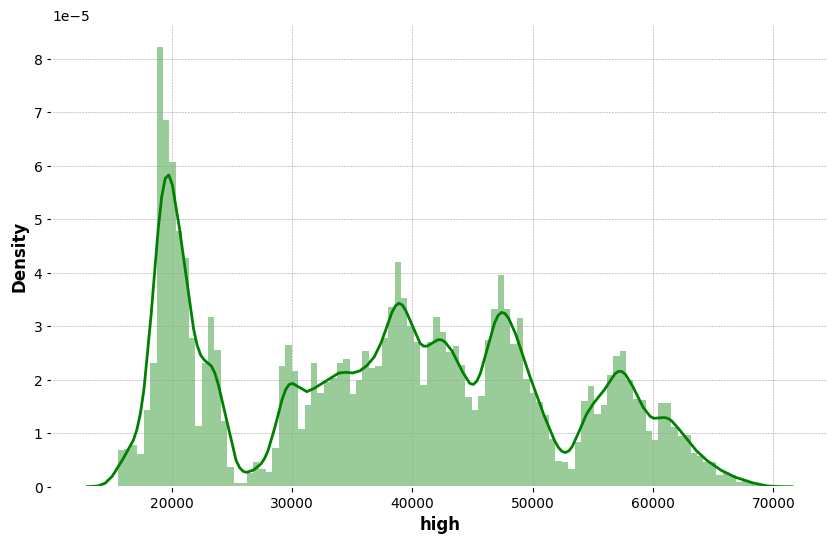

In [94]:
plt.figure(figsize=(10,6))
sns.distplot(btcusdt_df['high'], color='g', bins=100, hist_kws={'alpha': 0.4})

- **At 2021-11-10 high altitude reaches the highest value**
- **The number of peaks in 20000$ is the highest**

In [95]:
btcusdt_df[['open_time', 'low']].groupby(['open_time'], as_index=False).mean().sort_values(by='low', ascending=False)

,open_time,low
522502,2021-11-10 09:16:00-05:00,68786.70
522501,2021-11-10 09:15:00-05:00,68718.89
522504,2021-11-10 09:18:00-05:00,68693.24
522610,2021-11-10 11:04:00-05:00,68633.90
522658,2021-11-10 11:52:00-05:00,68633.00
...,...,...
307,2020-11-11 19:16:00-05:00,15513.32
306,2020-11-11 19:15:00-05:00,15500.01
305,2020-11-11 19:14:00-05:00,15486.00
303,2020-11-11 19:12:00-05:00,15480.00


<AxesSubplot:xlabel='low', ylabel='Density'>

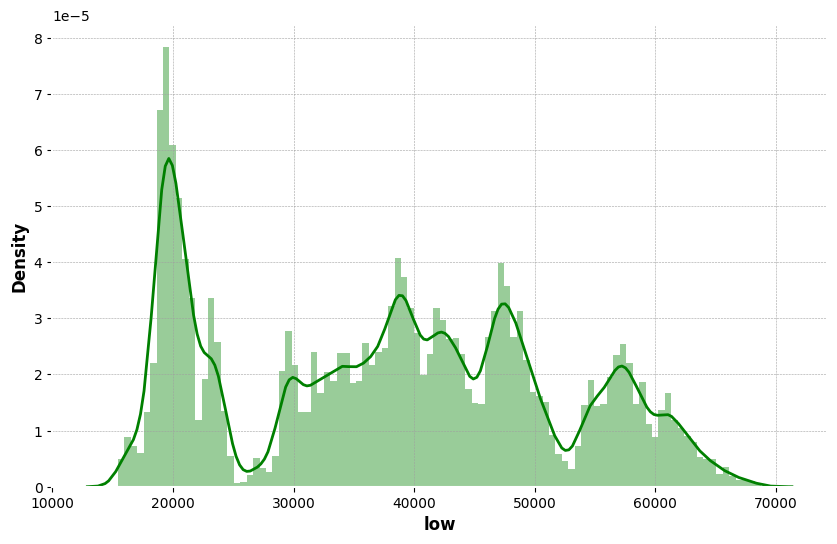

In [96]:
plt.figure(figsize=(10,6))
sns.distplot(btcusdt_df['low'], color='g', bins=100, hist_kws={'alpha': 0.4})

- **At 2021-11-10 low altitude reaches the highest value**
- **At 2020-11-11 low altitude reaches the lowest value**
### **=> Does not clearly show the correlation in terms of time**
- **Ideas:  divided into time frames**

In [97]:
time = btcusdt_df['open_time'].dt.time
time

0          14:09:00
1          14:10:00
2          14:11:00
3          14:12:00
4          14:13:00
             ...   
1049838    14:12:00
1049839    14:13:00
1049840    14:14:00
1049841    14:15:00
1049842    14:16:00
Name: open_time, Length: 1049843, dtype: object

In [98]:
btcusdt_df['time'] = time
btcusdt_df[['time', 'high']].groupby(['time'], as_index=False).mean().sort_values(by='high', ascending=False)

,time,high
571,09:31:00,38125.019835
572,09:32:00,38123.365652
585,09:45:00,38122.676337
570,09:30:00,38122.617627
600,10:00:00,38119.264636
...,...,...
24,00:24:00,37958.497387
28,00:28:00,37957.624773
29,00:29:00,37956.935172
26,00:26:00,37956.549835


<AxesSubplot:xlabel='time', ylabel='high'>

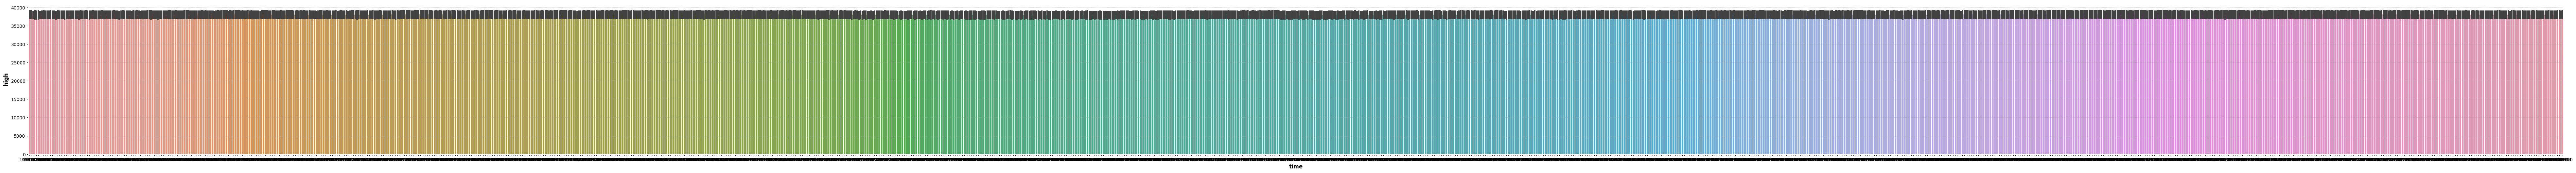

In [99]:
fig, ax = plt.subplots(figsize=(100,6))
sns.barplot(x='time', y='high', data=btcusdt_df, ax=ax)

**Dividing time into hours and minutes is too thick to control**
### **=>conducting separation**

In [100]:
minute = btcusdt_df['open_time'].dt.minute
minute

0           9
1          10
2          11
3          12
4          13
           ..
1049838    12
1049839    13
1049840    14
1049841    15
1049842    16
Name: open_time, Length: 1049843, dtype: int64

In [101]:
btcusdt_df['minute'] = minute
btcusdt_df[['minute', 'high']].groupby(['minute'], as_index=False).mean().sort_values(by='high', ascending=False)

,minute,high
0,0,38056.093645
30,30,38053.998286
1,1,38052.208109
45,45,38052.168665
31,31,38051.261202
2,2,38050.625059
15,15,38050.202338
46,46,38050.087774
35,35,38049.919890
32,32,38049.788083


<AxesSubplot:xlabel='minute', ylabel='Density'>

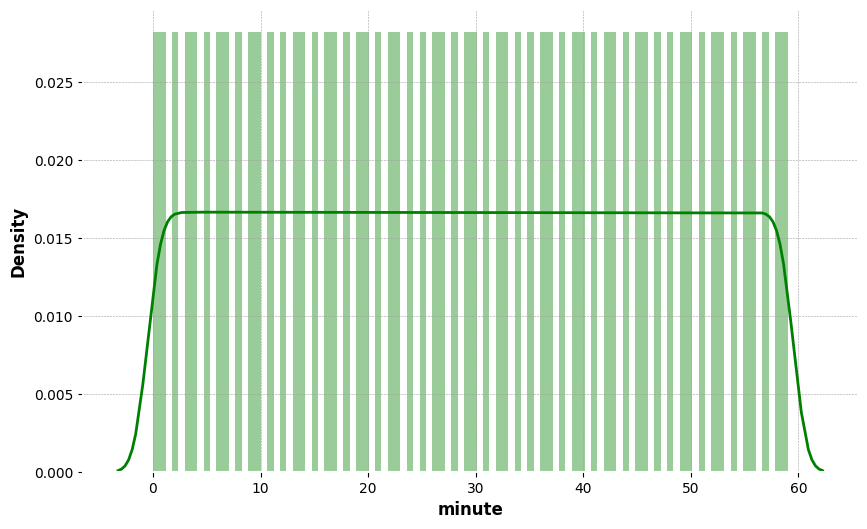

In [102]:
plt.figure(figsize=(10,6))
sns.distplot(btcusdt_df['minute'], color='g', bins=100, hist_kws={'alpha': 0.4})

<AxesSubplot:xlabel='minute', ylabel='high'>

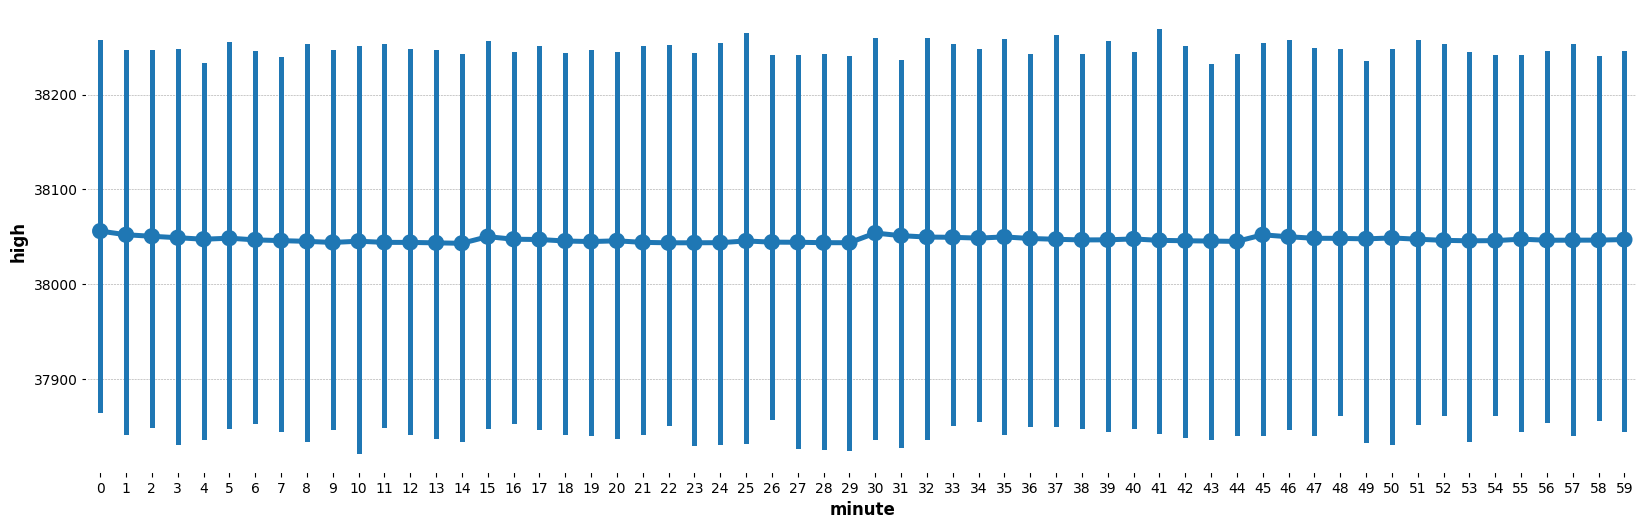

In [103]:
plt.figure(figsize=(20,6))
sns.pointplot(x='minute', y='high', data=btcusdt_df)

<AxesSubplot:xlabel='minute', ylabel='low'>

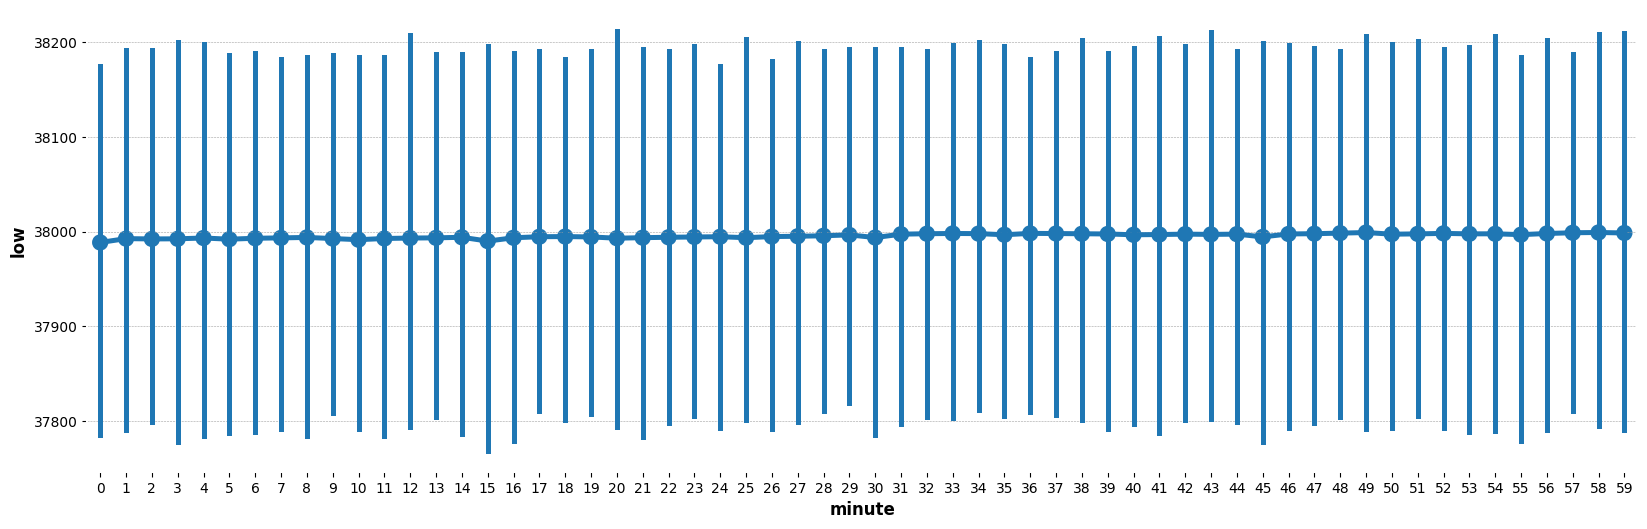

In [104]:
plt.figure(figsize=(20,6))
sns.pointplot(x='minute', y='low', data=btcusdt_df)

**It's as straight as my heartbeat when I see her smiling at someone other than me. (っ °Д °;)っ**
###
**maybe this isn't supposed to be tried another way to be with her. (；′⌒`)**

In [105]:
hour = btcusdt_df['open_time'].dt.hour
hour

0          14
1          14
2          14
3          14
4          14
           ..
1049838    14
1049839    14
1049840    14
1049841    14
1049842    14
Name: open_time, Length: 1049843, dtype: int64

In [106]:
btcusdt_df['hour'] = hour
btcusdt_df[['hour', 'high']].groupby(['hour'], as_index=False).mean().sort_values(by='high', ascending=False)

,hour,high
9,9,38102.902566
11,11,38091.429205
12,12,38088.436730
10,10,38087.031656
18,18,38077.348800
8,8,38075.362991
19,19,38074.401187
20,20,38065.321623
17,17,38060.064424
16,16,38059.479835


<AxesSubplot:xlabel='hour', ylabel='high'>

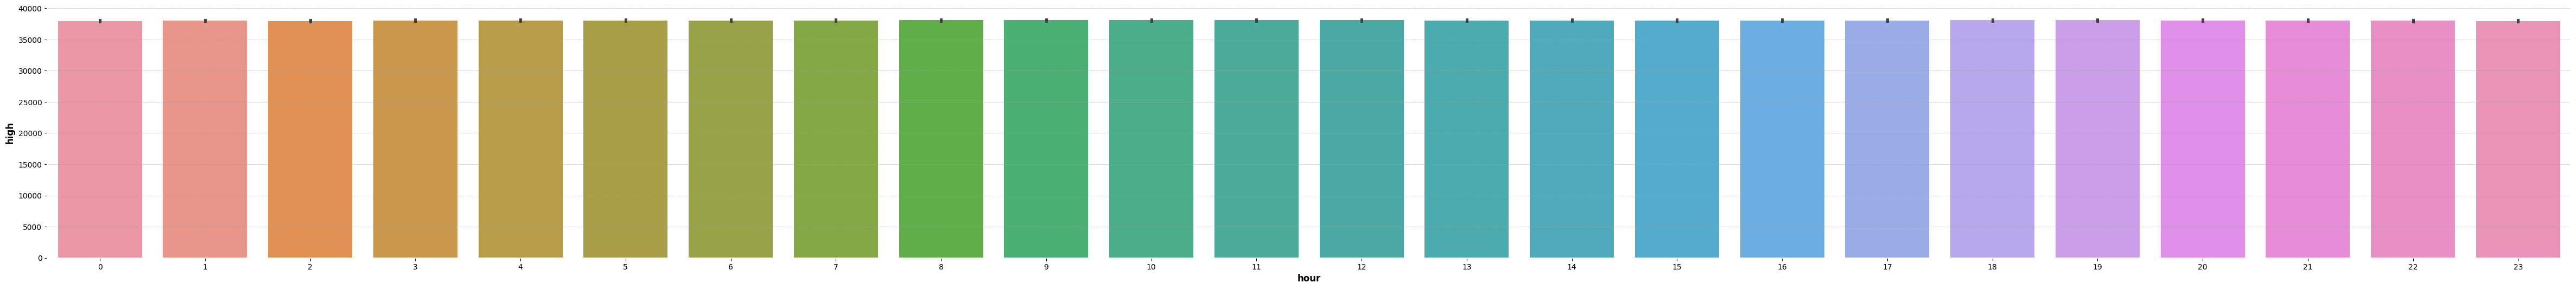

In [107]:
fig, ax = plt.subplots(figsize=(60,6))
sns.barplot(x='hour', y='high', data=btcusdt_df, ax=ax)

<AxesSubplot:xlabel='hour', ylabel='high'>

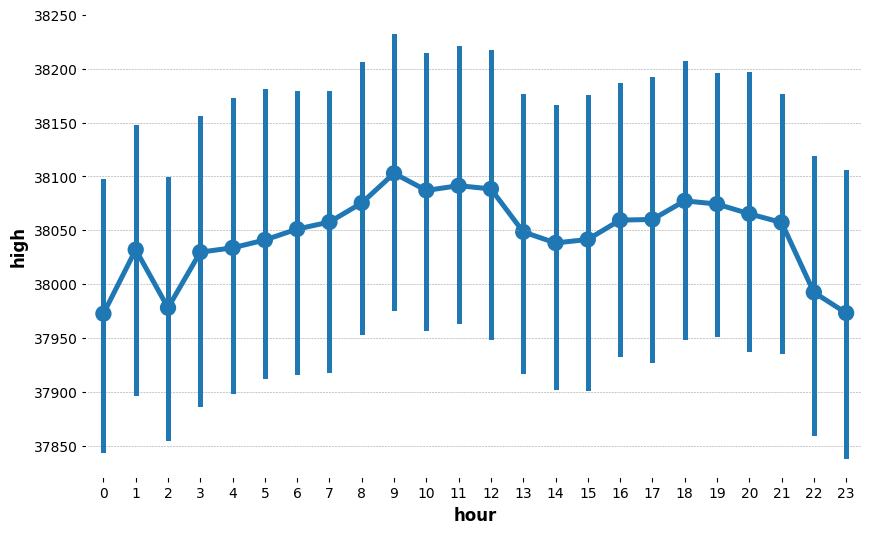

In [108]:
plt.figure(figsize=(10,6))
sns.pointplot(x='hour', y='high', data=btcusdt_df)

### The results were quite positive. It's 9 a.m. when the sharktank wakes up from his slumber. (￣y▽￣)╭ Ohohoho.....
### Tips: To play from 3 a.m. to 9 a.m.
***Note: The first paragraph is to eat shjt ○( ＾皿＾)っ Hehehe….***
- Next we should find out when we shouldn't play. (╹ڡ╹ )

In [109]:
btcusdt_df[['hour', 'low']].groupby(['hour'], as_index=False).mean().sort_values(by='low', ascending=False)

,hour,low
9,9,38040.930627
12,12,38030.590707
11,11,38030.178716
18,18,38025.853350
10,10,38024.501639
19,19,38020.894203
8,8,38018.294730
17,17,38013.553433
21,21,38008.775548
20,20,38008.766388


<AxesSubplot:xlabel='hour', ylabel='low'>

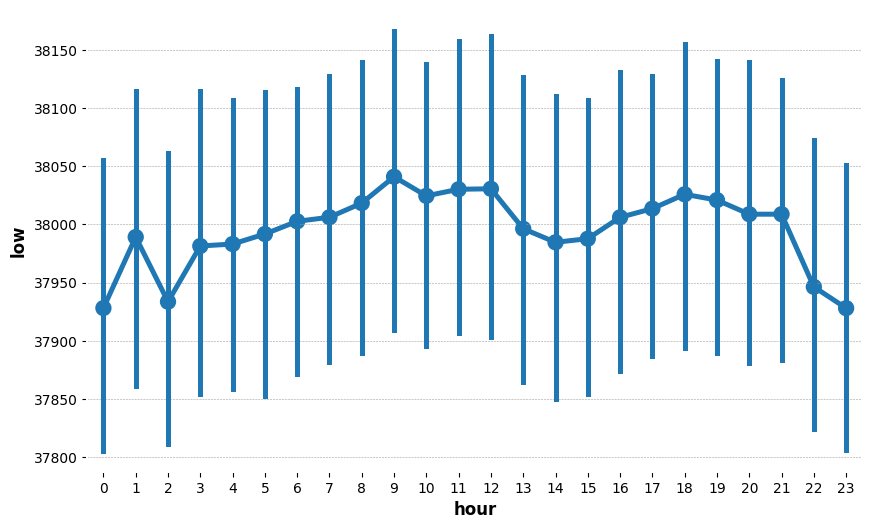

In [110]:
plt.figure(figsize=(10,6))
sns.pointplot(x='hour', y='low', data=btcusdt_df)

### **Do you have a lot of questions?**
**I'm too.  (。・∀・)ノ**

**In simple terms, high and low are high and low trading levels for a certain period of time. So the 2 models will not be much different. Currently high and low will be by the minute.**

**=> But we can still see the sharks going to bed quite early around 8 p.m. and the peak is the sharks going to bed at 11 and 12 o'clock.**
### It's unexpected ( ఠ ͟ʖ ఠ), isn't it? The sharktanks turned out to be the same as normal people but it seemed that the sharks slept very little and got up very early.
### **=> We draw that conclusion: Sleep early, do a lot of food, play doses, eat socks. (～￣▽￣)～**
### Young people, get up early to succeed, don't dream of this way to get rich anymore.
**So I'm 21 years old -> very old (*￣3￣)╭.**
###
**After choosing a beautiful time zone, we move on to a beautiful day.**

In [111]:
day = btcusdt_df['open_time'].dt.day
day

0          11
1          11
2          11
3          11
4          11
           ..
1049838    11
1049839    11
1049840    11
1049841    11
1049842    11
Name: open_time, Length: 1049843, dtype: int64

In [112]:
btcusdt_df['day'] = day
btcusdt_df[['day', 'high']].groupby(['day'], as_index=False).mean().sort_values(by='high', ascending=False)

,day,high
8,9,39289.479799
9,10,39096.025129
13,14,38848.649810
7,8,38841.800353
10,11,38781.432259
14,15,38773.758424
6,7,38697.054800
2,3,38620.789881
15,16,38566.274636
5,6,38516.467181


<AxesSubplot:xlabel='day', ylabel='high'>

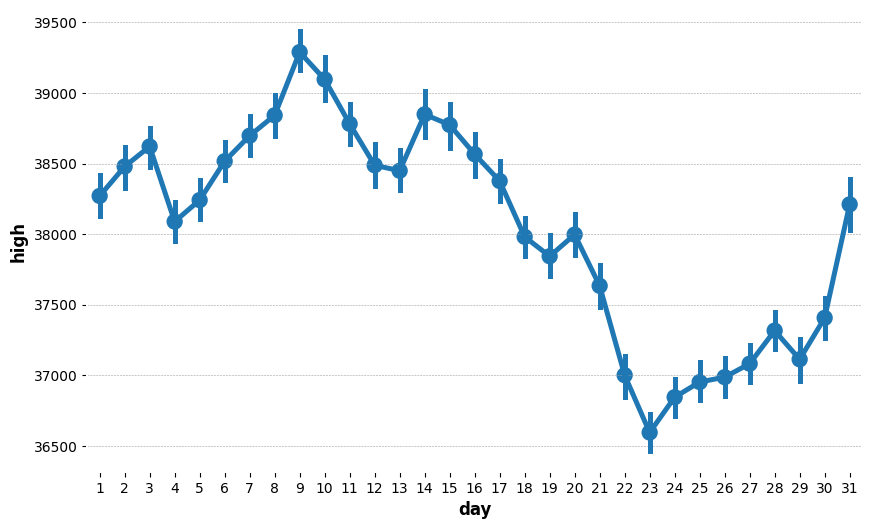

In [113]:
plt.figure(figsize=(10,6))
sns.pointplot(x='day', y='high', data=btcusdt_df)

### OMG Is this a coincidence or a preset ( ͡ಠ ʖ̯ ͡ಠ).
- **Around the same time as the time zone, on the 4th to the 9th of 1 month, there is always uniform growth and all peak on the 9th.**
- **Maybe I figured out the rule. Nature was terrified**
**<p>I probably won't handle low anymore because it's charted as well.</p>**

***Now let's find out which month is the most beautiful month for BTC.***

In [114]:
month = btcusdt_df['open_time'].dt.month
month

0          11
1          11
2          11
3          11
4          11
           ..
1049838    11
1049839    11
1049840    11
1049841    11
1049842    11
Name: open_time, Length: 1049843, dtype: int64

In [115]:
btcusdt_df['month'] = month
btcusdt_df[['month', 'high']].groupby(['month'], as_index=False).mean().sort_values(by='high', ascending=False)

,month,high
3,4,49348.171023
2,3,48346.571733
1,2,43412.916087
10,11,39501.935481
4,5,39361.538264
9,10,38707.931124
0,1,37854.794523
11,12,35690.812970
7,8,33994.067165
8,9,32924.223429


<AxesSubplot:xlabel='month', ylabel='high'>

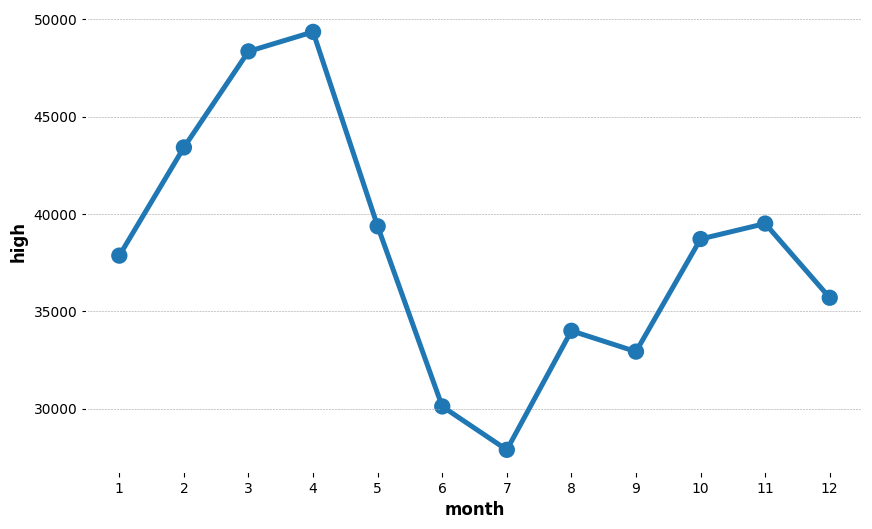

In [117]:
plt.figure(figsize=(10,6))
sns.pointplot(x='month', y='high', data=btcusdt_df)

- There is a correlation between month and day and time here.
- The chart shows that the start is always up and will peak when at 1/3 of the distance. And when in paragraph 3/3 will also increase.
- Perhaps this is the post of the sharktank that always pushes at the beginning and drops the slope then pushes back slowly. Take advantage of greedy chickens.
- So i'm chiken too (￣﹃￣)
###

***Now let's try to test next year.***

In [118]:
year = btcusdt_df['open_time'].dt.year
year

0          2020
1          2020
2          2020
3          2020
4          2020
           ... 
1049838    2022
1049839    2022
1049840    2022
1049841    2022
1049842    2022
Name: open_time, Length: 1049843, dtype: int64

In [119]:
btcusdt_df['year'] = year
btcusdt_df[['year', 'high']].groupby(['year'], as_index=False).mean().sort_values(by='high', ascending=False)

,year,high
1,2021,47403.687425
2,2022,30054.552789
0,2020,20215.424312


<AxesSubplot:xlabel='year', ylabel='high'>

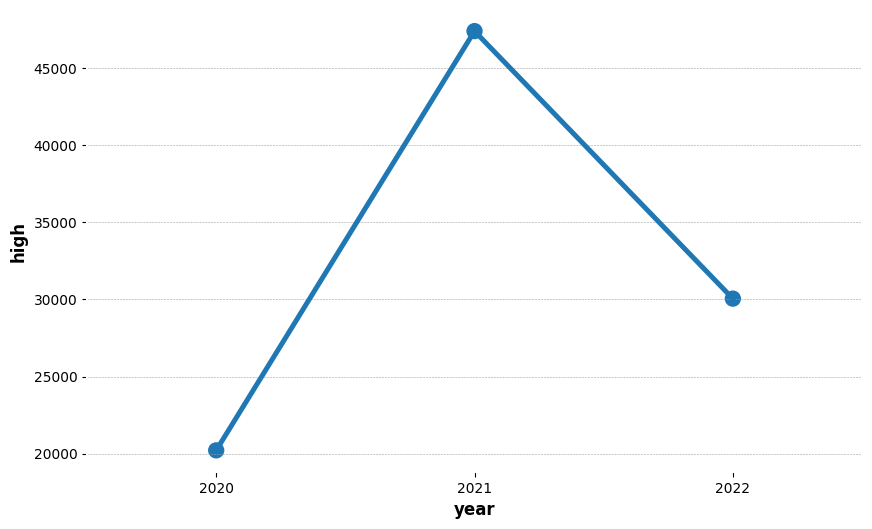

In [120]:
plt.figure(figsize=(10,6))
sns.pointplot(x='year', y='high', data=btcusdt_df)

- only 3 data available but we can guess through the above charts that in the next 2 years BTC will go up again but it will probably be difficult to overcome 2021. But now is the time to buy.
- Or maybe it'll all just be my guess. (～￣▽￣)～

In [121]:
btcusdt_df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,time,minute,hour,day,month,year
0,2020-11-11 14:09:00-05:00,15863.79,15863.79,15844.34,15846.36,45.504945,2020-11-11 14:09:59.999000064-05:00,721448.646407,733.0,20.034791,317634.449780,0,14:09:00,9,14,11,11,2020
1,2020-11-11 14:10:00-05:00,15846.35,15848.35,15835.36,15839.97,43.238682,2020-11-11 14:10:59.999000064-05:00,684859.284441,718.0,18.795452,297688.465738,0,14:10:00,10,14,11,11,2020
2,2020-11-11 14:11:00-05:00,15839.97,15839.98,15808.87,15816.68,56.367325,2020-11-11 14:11:59.999000064-05:00,891980.315430,938.0,17.360259,274676.225348,0,14:11:00,11,14,11,11,2020
3,2020-11-11 14:12:00-05:00,15816.68,15845.46,15810.52,15828.86,46.799855,2020-11-11 14:12:59.999000064-05:00,740839.187743,849.0,22.715319,359629.946412,0,14:12:00,12,14,11,11,2020
4,2020-11-11 14:13:00-05:00,15828.86,15845.63,15828.85,15841.83,38.239808,2020-11-11 14:13:59.999000064-05:00,605782.657620,550.0,8.964647,141997.855299,0,14:13:00,13,14,11,11,2020


### **Until now, we've only examined the correlation between Open Time and Close Time with High and Low.**
###
**Now with the time divided we try to visualize them with volumes.**

In [122]:
import mplfinance as mpf

In [ ]:
mpf.plot(btcusdt_df.set_index('open_time'), type='candle', style='charles', volume=True, mav=(3,6,9), figratio=(20,10), figscale=1)

KeyboardInterrupt: 

**Don't run because you'll have to spend a lot of time. I foolishly waited 1 hour and had to stop.(￣﹃￣)**
###
**I'll try to get 100 records instead.**

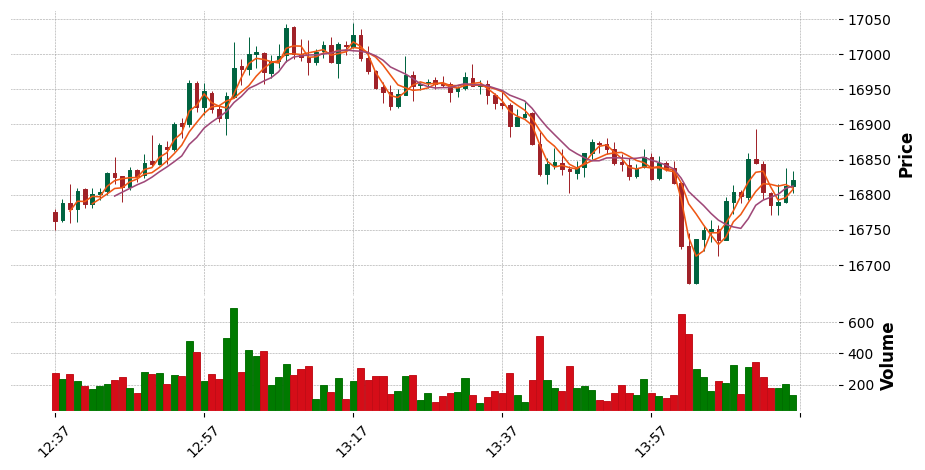

In [123]:
mpf.plot(btcusdt_df.set_index('open_time').tail(100), type='candle', style='charles', volume=True, mav=(3,6,9), figratio=(20,10), figscale=1)

In [134]:
df_year = btcusdt_df[['year', 'open', 'high','low','close', 'volume']].groupby(['year'], as_index=False).mean()
df_year

,year,open,high,low,close,volume
0,2020,20201.905689,20215.424312,20187.677723,20202.093491,59.253518
1,2021,47367.838426,47403.687425,47332.052244,47367.868332,48.632654
2,2022,30038.176187,30054.552789,30022.029840,30038.108278,95.471145


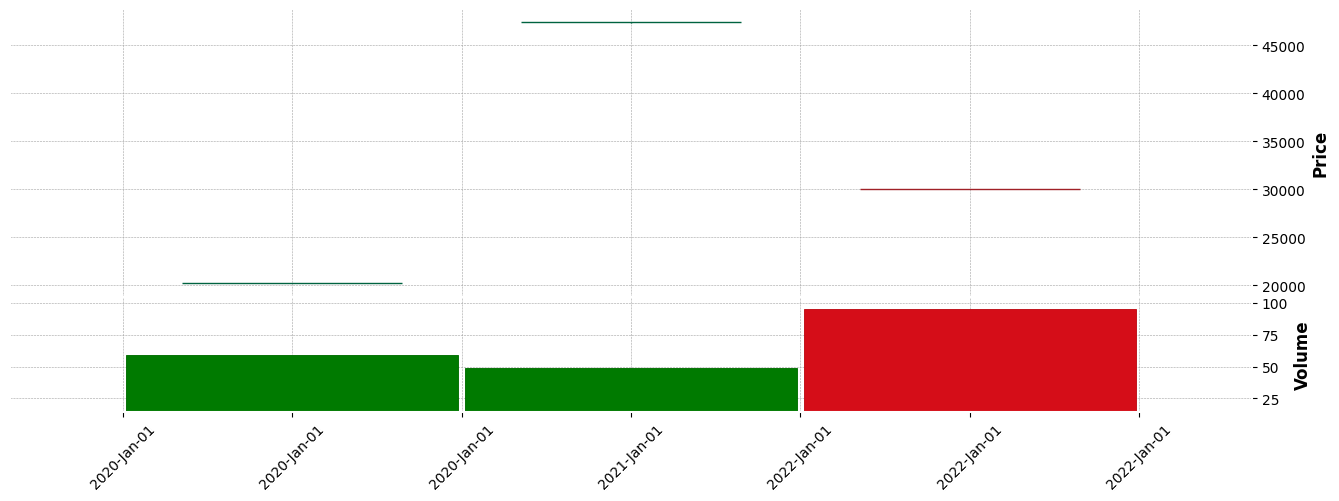

In [135]:
df_year['year'] = pd.to_datetime(df_year['year'], format='%Y')
mpf.plot(df_year.set_index('year'), type='candle', style='charles', volume=True, mav=(3,6,9), figratio=(60,20), figscale=1)

In [136]:
df_year.sort_values(by='volume', ascending=False)

,year,open,high,low,close,volume
2,2022-01-01,30038.176187,30054.552789,30022.029840,30038.108278,95.471145
0,2020-01-01,20201.905689,20215.424312,20187.677723,20202.093491,59.253518
1,2021-01-01,47367.838426,47403.687425,47332.052244,47367.868332,48.632654


In [137]:
df_month = btcusdt_df[['month', 'open', 'high','low','close', 'volume']].groupby(['month'], as_index=False).mean()
df_month

,month,open,high,low,close,volume
0,1,37819.933541,37854.794523,37784.512361,37819.894268,52.917852
1,2,43376.976681,43412.916087,43341.747886,43377.198535,46.867127
2,3,48315.727634,48346.571733,48284.589600,48315.881613,40.354816
3,4,49321.641730,49348.171023,49295.114337,49321.567458,37.897701
4,5,39323.834235,39361.538264,39287.622635,39323.498629,66.406286
5,6,30083.449623,30108.627194,30059.206796,30083.276500,66.390240
6,7,27860.825160,27878.295006,27843.736107,27860.947726,75.568472
7,8,33975.169270,33994.067165,33956.046146,33975.187179,82.523937
8,9,32905.000092,32924.223429,32885.778692,32904.952205,131.621824
9,10,38688.313919,38707.931124,38668.421757,38688.505057,101.744612


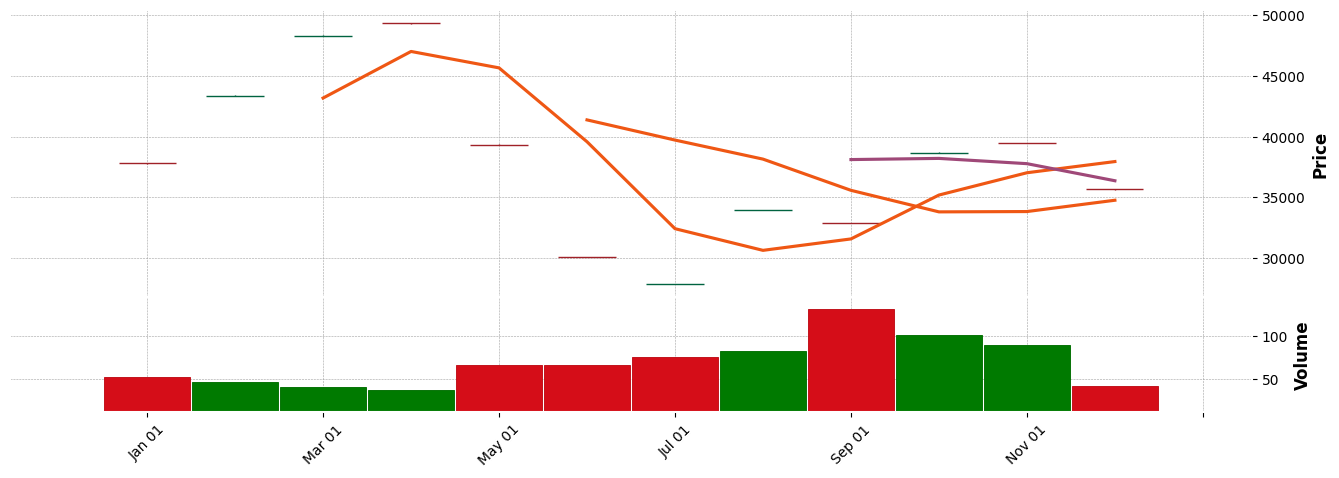

In [138]:
df_month['month'] = pd.to_datetime(df_month['month'], format='%m')
mpf.plot(df_month.set_index('month'), type='candle', style='charles', volume=True, mav=(3,6,9), figratio=(60,20), figscale=1)

In [139]:
df_month.sort_values(by='volume', ascending=False)

,month,open,high,low,close,volume
8,1900-09-01,32905.000092,32924.223429,32885.778692,32904.952205,131.621824
9,1900-10-01,38688.313919,38707.931124,38668.421757,38688.505057,101.744612
10,1900-11-01,39478.935719,39501.935481,39455.497728,39478.900778,89.845753
7,1900-08-01,33975.169270,33994.067165,33956.046146,33975.187179,82.523937
6,1900-07-01,27860.825160,27878.295006,27843.736107,27860.947726,75.568472
4,1900-05-01,39323.834235,39361.538264,39287.622635,39323.498629,66.406286
5,1900-06-01,30083.449623,30108.627194,30059.206796,30083.276500,66.390240
0,1900-01-01,37819.933541,37854.794523,37784.512361,37819.894268,52.917852
1,1900-02-01,43376.976681,43412.916087,43341.747886,43377.198535,46.867127
11,1900-12-01,35668.511830,35690.812970,35645.526602,35668.503553,41.856341


In [140]:
df_day = btcusdt_df[['day', 'open', 'high','low','close', 'volume']].groupby(['day'], as_index=False).mean()
df_day

,day,open,high,low,close,volume
0,1,38247.152869,38270.289519,38224.059987,38247.291169,59.934903
1,2,38457.807787,38478.940512,38436.725527,38458.033058,59.822905
2,3,38598.736763,38620.789881,38575.968126,38598.370338,58.928368
3,4,38063.545212,38088.780975,38038.277931,38063.589668,70.030394
4,5,38218.138524,38240.788099,38195.358792,38218.331848,63.258309
5,6,38493.258123,38516.467181,38469.517443,38493.399239,64.051470
6,7,38671.894731,38697.054800,38646.154938,38671.803072,68.404888
7,8,38813.573852,38841.800353,38785.889881,38814.033366,87.577060
8,9,39263.894795,39289.479799,39238.717104,39263.925557,84.846442
9,10,39066.886477,39096.025129,39037.010639,39066.553948,83.767994


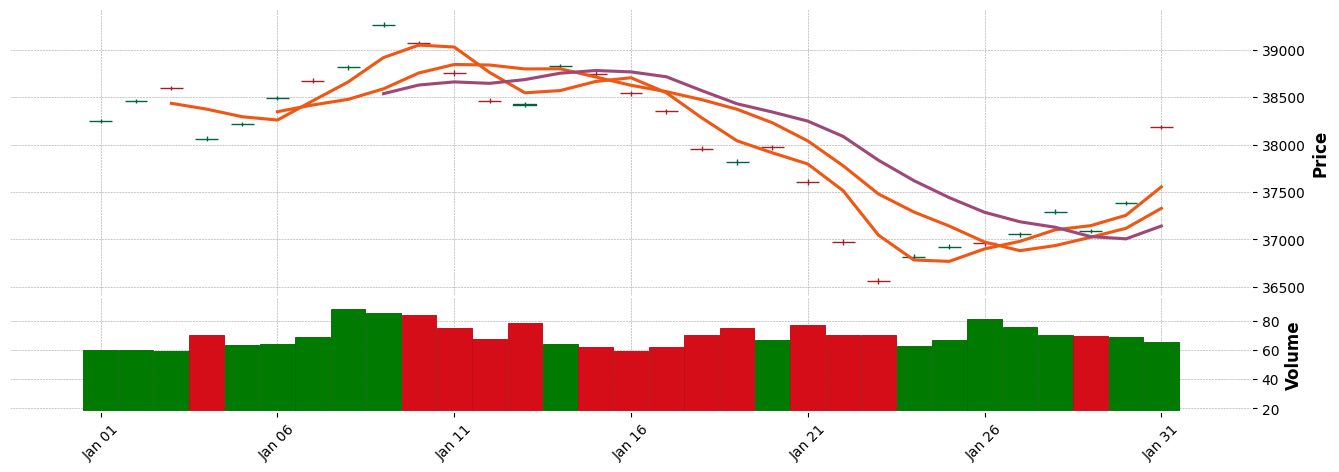

In [141]:
df_day['day'] = pd.to_datetime(df_day['day'], format='%d')
mpf.plot(df_day.set_index('day'), type='candle', style='charles', volume=True, mav=(3,6,9), figratio=(60,20), figscale=1)

In [142]:
df_day.sort_values(by='volume', ascending=False)

,day,open,high,low,close,volume
7,1900-01-08,38813.573852,38841.800353,38785.889881,38814.033366,87.577060
8,1900-01-09,39263.894795,39289.479799,39238.717104,39263.925557,84.846442
9,1900-01-10,39066.886477,39096.025129,39037.010639,39066.553948,83.767994
25,1900-01-26,36959.249675,36986.604661,36931.377267,36959.076725,81.018805
12,1900-01-13,38421.952514,38448.972648,38395.637314,38422.264543,78.030172
20,1900-01-21,37602.622939,37633.514314,37571.547160,37602.075585,77.086139
26,1900-01-27,37056.307916,37081.877990,37031.048879,37056.407782,75.393561
10,1900-01-11,38753.004944,38781.432259,38724.642032,38752.981299,75.051496
18,1900-01-19,37814.264011,37843.136055,37786.359010,37814.392907,74.555166
21,1900-01-22,36970.462776,37000.550613,36940.585967,36970.283673,70.145714


### **Conclusion: I don't even understand what I'm doing.   (っ °Д °;)っ**